In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from simulation_functions import *
from tqdm import tqdm
from scipy.integrate import solve_ivp

In [2]:
ks = load_3d_matrix_from_csv("many_ks.csv")
Ks = load_3d_matrix_from_csv("many_KKs.csv")

In [7]:
K = Ks[1,:,:]
k = ks[1,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 200
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)

In [8]:
w[0]/w[1]

(0.246138014629198-0j)

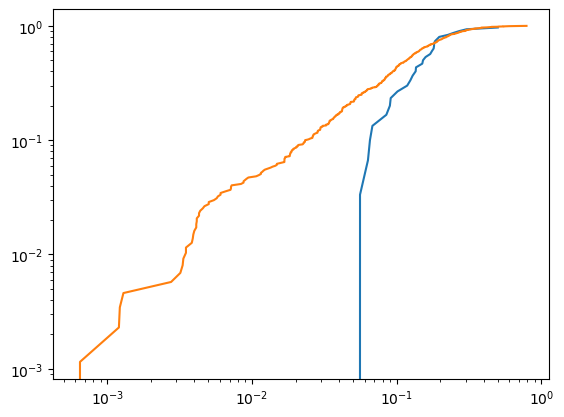

In [174]:
v_to_plot = np.abs(v)
sorted_v0 = np.sort(v_to_plot[:,0])[::-1]
plt.plot(sorted_v0,1 - np.arange(1, len(sorted_v0) + 1) / len(sorted_v0))
sorted_v = np.sort(np.ravel((v_to_plot[:,1:])))[::-1]
plt.plot(sorted_v,1 - np.arange(1, len(sorted_v) + 1) / len(sorted_v))
plt.yscale('log')
plt.xscale('log')

In [175]:
g = 30
lam = 5
is_connected = np.random.rand(g,g) < .25
is_connected = np.tril(is_connected, k=-1)
is_connected = is_connected + np.transpose(is_connected)
k = np.multiply(is_connected,np.random.rand(g,g))
K = np.multiply(is_connected,np.random.rand(g,g))
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)

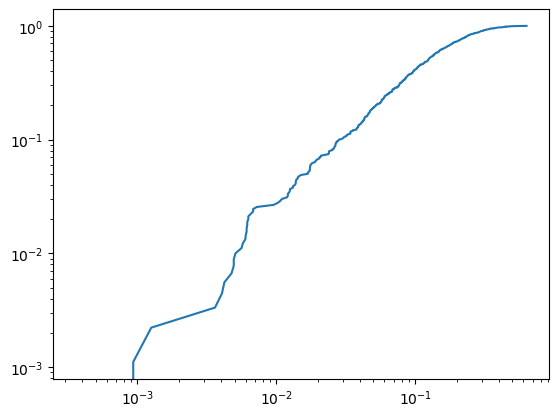

In [176]:
v_to_plot = np.abs(v)
sorted_v0 = np.sort(v_to_plot[:,0])[::-1]
sorted_v = np.sort(np.ravel((v_to_plot[:,:])))[::-1]
plt.plot(sorted_v,1 - np.arange(1, len(sorted_v) + 1) / len(sorted_v))
plt.yscale('log')
plt.xscale('log')

In [44]:
K = Ks[2,:,:]
k = ks[2,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 200
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)

t_f = 5
m = 20
g = len(lam)
lam_c_0 = np.random.rand(g)-0.5 
s_hat_0 = np.random.rand(g)-0.5 
s_hat_0 = s_hat_0/np.linalg.norm(s_hat_0)
temperature = 1.0
cooling_rate = 0.96
num_iterations = 1000
best_s_hat, best_lam_c, costs = simulated_annealing(k,K,n_f,lam,lam_c_0,s_hat_0,m,t_f, num_iterations, temperature, cooling_rate,g)

100%|███████████████████████████████████████| 1000/1000 [06:28<00:00,  2.57it/s]


In [76]:
K = Ks[2,:,:]
k = ks[2,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 200
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)

In [179]:
i = 50
K = Ks[i,:,:]
k = ks[i,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 200
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]
dists_doc = []
dists_no_doc = []
is_connected = k != 0
for r in tqdm(range(100)):
    l = np.random.randint(len(np.nonzero(is_connected)[0]))
    i, j = np.nonzero(is_connected)[0][l],np.nonzero(is_connected)[1][l]
    k_new = np.array(current_k)
    K_new = np.array(current_K)
    K_new[i,j] = K_new[i,j] + (np.random.rand() - 0.5)*2/200
    k_new[i,j] = k_new[i,j] + (np.random.rand() - 0.5)*2/200
    if k_new[i,j] < 1 and K_new[i,j] < 1 and K_new[i,j] > 0 and k_new[i,j]> 0:
        nt, t = sim_dyn_controlled(n_f,t_f,k_new,K_new,n_f,lam,np.zeros(g),lam_cs[i],s_hats[i])
        dists_doc.append(np.linalg.norm(nt[:,-1]-n_f))
        nt, t = sim_dyn(n_f,t_f,k_new,K_new,lam)
        dists_no_doc.append(np.linalg.norm(nt[:,-1]-n_f))

100%|█████████████████████████████████████████| 100/100 [00:06<00:00, 15.49it/s]


In [159]:
nt, t = sim_dyn_controlled(n_f,t_f,k_new,K_new,n_f,lam,np.zeros(g),lam_cs[i],s_hats[i])
np.linalg.norm(nt[:,-1]-n_f)


0.14741213928714803

(array([ 1.,  0.,  0., 10., 83.,  2.,  1.,  1.,  0.,  1.]),
 array([0.93286831, 0.94825072, 0.96363312, 0.97901553, 0.99439794,
        1.00978035, 1.02516275, 1.04054516, 1.05592757, 1.07130997,
        1.08669238]),
 <BarContainer object of 10 artists>)

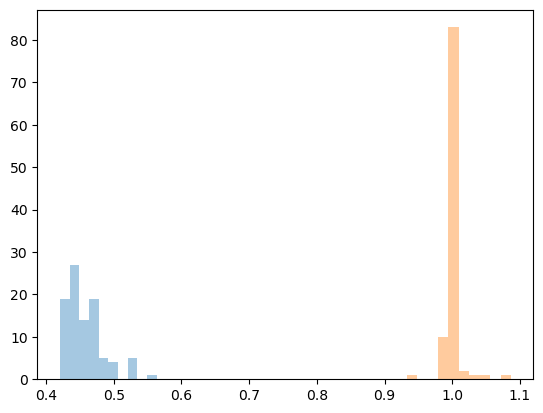

In [180]:
avg = np.mean(np.array(dists_no_doc)[np.array(dists_no_doc)<1])
plt.hist(np.array(dists_doc)[np.array(dists_doc)<1]/avg,alpha = 0.4)
plt.hist(np.array(dists_no_doc)[np.array(dists_no_doc)<1]/avg,alpha = 0.4)


In [163]:
dists_doc

[5.4464564128465345e+45,
 0.155533860751981,
 0.12547217774417224,
 0.10948708210903575,
 0.15552616341339362,
 0.11671217407177324,
 0.1254880051245926,
 0.12876073622405504,
 0.1092748053958752,
 0.12876867164519532,
 0.1094861362935622,
 0.09520690212397838,
 0.111172304797876,
 0.1094506217496621,
 0.10948794577906998,
 0.1094809514916933,
 0.11117333811328174,
 0.1094862141371443,
 0.11505625557325586,
 0.11671295307569338,
 0.12258113838979448,
 0.1195478253209981,
 0.11959220736985307,
 0.11117079714878857,
 0.11117295921514163,
 0.10948169029102982,
 0.1273374712476126,
 0.11505591572696619,
 0.1225827231401473,
 0.1167092873061031,
 0.13092292276041428,
 2.5788393851219843e+45,
 2.0568916047506318e+45,
 9.253224998958789e+45,
 3.821269813248143e+45,
 0.10949133771761412,
 0.1313564303437235,
 5.61531240369279e+44,
 0.15542744629427332,
 0.13394154090615024,
 0.09529395386720133,
 0.15554597024831174,
 0.14757345857314805,
 1.0883267392089855e+45,
 0.147397312974595,
 0.1555340

In [117]:
evaluate_fitness_controlled_norm(k,K,n_f,lam,np.zeros(g),np.zeros(g),m,t_f,g)

1.0

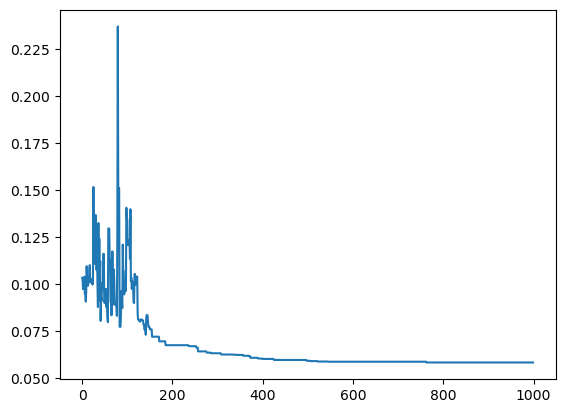

In [45]:
plt.plot(costs)


In [46]:
evaluate_fitness_controlled(k,K,n_f,lam,np.zeros(g),np.zeros(g),m,t_f,g)

0.10107644946922426

In [47]:
evaluate_fitness_controlled(k,K,n_f,lam,best_lam_c,best_s_hat,m,t_f,g)

0.058411310731752285

In [81]:
i = 1
float(np.loadtxt("fitness" + str(i) + ".csv", delimiter=','))

0.02672200172460787

In [10]:
fitnesses = []
s_hats = []
lam_cs = []
dlambdas = []
for i in range(0,len(ks)):
    fitnesses.append(float(np.loadtxt("fitness" + str(i) + ".csv", delimiter=',')))
    s_hats.append((np.loadtxt("best_s_hat_" + str(i) + ".csv", delimiter=',')))
    lam_cs.append((np.loadtxt("best_lam_c" + str(i) + ".csv", delimiter=',')))
    n0 = np.zeros(g) + 0.5
    nt = simulate_dynamics(ks[i],Ks[i],lam,n0)
    n_f = nt[:,-1]
    J = calc_J(ks[i],Ks[i],n_f,lam)
    w, v = np.linalg.eig(J)
    w = np.real(w)
    dlambda_new = np.sort(w)[-2]/np.sort(w)[-1]
    dlambdas.append(dlambda_new)

In [ ]:
evaluate_fitness_controlled(k,K,n_f,lam,best_lam_c,best_s_hat,m,t_f,g)

In [112]:
s_hats[0]

array([-0.06731389, -0.11339374, -0.46002822, -0.00470386, -0.28829378,
        0.05449446, -0.10945386, -0.04073249, -0.32557782, -0.08449431,
       -0.16926256,  0.14517786,  0.01977022, -0.15412395, -0.26469189,
       -0.03219216, -0.27638907, -0.15072887, -0.10494324, -0.24698317,
        0.10628593, -0.11070767, -0.06821135, -0.15709761, -0.01633545,
       -0.09965547,  0.03751157, -0.26451749, -0.30136125,  0.12933703])

In [86]:
np.loadtxt("best_s_hat_" + str(i) + ".csv", delimiter=',')

array([-0.06731389, -0.11339374, -0.46002822, -0.00470386, -0.28829378,
        0.05449446, -0.10945386, -0.04073249, -0.32557782, -0.08449431,
       -0.16926256,  0.14517786,  0.01977022, -0.15412395, -0.26469189,
       -0.03219216, -0.27638907, -0.15072887, -0.10494324, -0.24698317,
        0.10628593, -0.11070767, -0.06821135, -0.15709761, -0.01633545,
       -0.09965547,  0.03751157, -0.26451749, -0.30136125,  0.12933703])

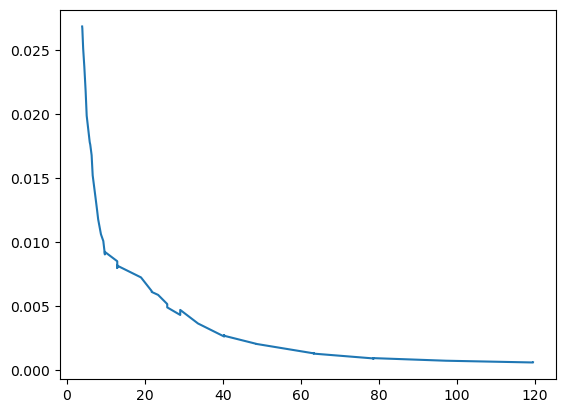

In [83]:
plt.plot(np.array(dlambdas),fitnesses)

In [45]:
dlambdas

[3.9412184104603707,
 3.986208655746162,
 4.200318924625235,
 4.5021658290269935,
 4.835931569570316,
 5.107051944325497,
 5.881926539751058,
 6.024716894006594,
 6.369821318776041,
 6.6424341636633235,
 7.3521788844601845,
 7.79310821353802,
 8.047533571346824,
 8.759347275222773,
 9.376876822420197,
 9.376876822420197,
 9.766232657036795,
 9.766232657036795,
 9.766232657036795,
 12.938197567375074,
 12.938197567375074,
 12.938197567375074,
 12.938197567375074,
 12.938197567375074,
 12.938197567375074,
 19.01836938525285,
 21.76185844068695,
 21.76185844068695,
 23.412128567736627,
 25.747967461298277,
 25.747967461298277,
 25.747967461298277,
 29.076873324078605,
 29.076873324078605,
 33.63373412959185,
 40.33790514871258,
 40.33790514871258,
 40.33790514871258,
 40.33790514871258,
 48.45905645021664,
 48.45905645021664,
 63.2971305276921,
 63.2971305276921,
 63.2971305276921,
 78.58022449158587,
 78.58022449158587,
 78.58022449158587,
 78.58022449158587,
 97.1583549355404,
 119.4925

In [47]:
np.where(np.array(dlambdas)==40.33790514871258)

(array([35, 36, 37, 38]),)

In [56]:
dlambdas_unique = np.unique(dlambdas)
fitnesses_unique = [fitnesses[np.where(np.array(dlambdas)==dlambdas_unique[i])[0][0]] for i in range(len(dlambdas_unique))]

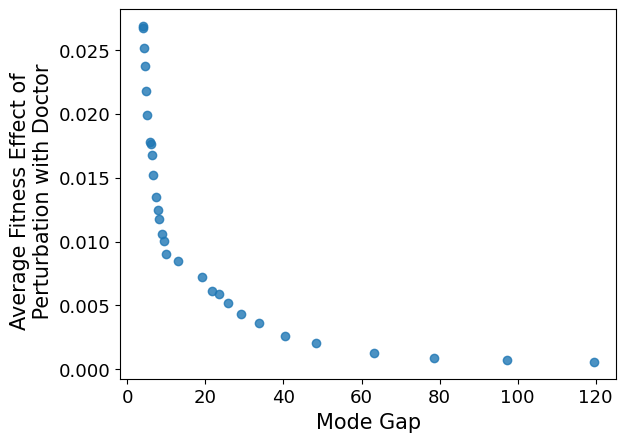

In [70]:
plt.scatter(dlambdas_unique,fitnesses_unique,alpha = 0.8)
plt.ylabel('Average Fitness Effect of  \n Perturbation with Doctor', fontsize=15)
plt.xlabel('Mode Gap', fontsize=15)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()
# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(13)  # Adjust the font size as desired

In [55]:
np.where(np.array(dlambdas)==dlambdas_unique[i])[0][0]

49

In [67]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

Text(0.5, 0, 'Time')

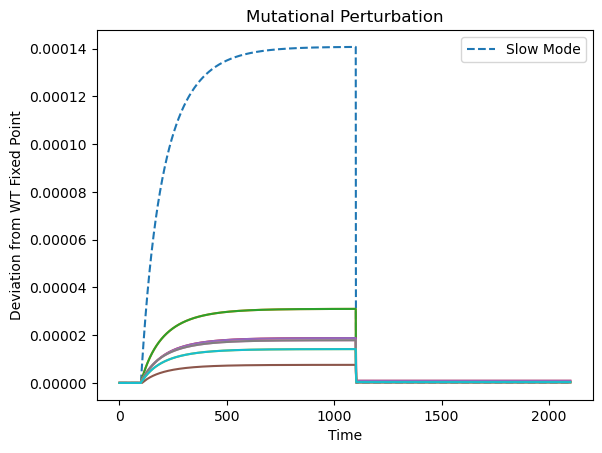

In [91]:
K = Ks[-5,:,:]
k = ks[-5,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 2000
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
nt_0 = nt[:,900:]
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)
t_f =700

k_p = np.array(ks[-1])
mut_idx = np.random.randint(len(np.nonzero(k_p)[0]))
k_p[np.nonzero(k_p)[0][mut_idx],np.nonzero(k_p)[1][mut_idx]] = k_p[np.nonzero(k_p)[0][mut_idx],np.nonzero(k_p)[1][mut_idx]]*10**(2*np.random.rand()-1)
nt, t = sim_dyn(n_f,t_f,k_p,K,lam)
lam_c = lam_cs[-5]
s_hat = s_hats[-5]

nt_c, t = sim_dyn_controlled(nt[:,-1],t_f,k_p,K,n_f,lam,np.zeros(g),lam_c,s_hat)
plot_eigenvectors(v,np.concatenate((nt_0,nt,nt_c),axis = 1),n_f,v_0_idx = 0, v_f_idx = 10)
plt.ylabel('Deviation from WT Fixed Point')
plt.title('Mutational Perturbation')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

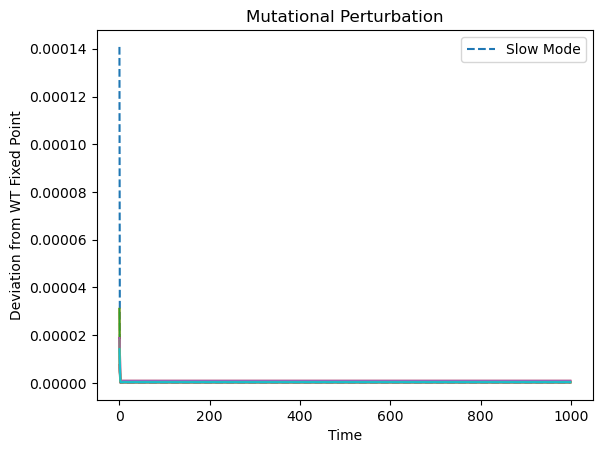

In [101]:
nt_c, t = sim_dyn_controlled(nt[:,-1],t_f,k_p,K,n_f,lam,np.zeros(g),lam_c,s_hat)
plot_eigenvectors(v,nt_c,n_f,v_0_idx = 0, v_f_idx = 10)
plt.ylabel('Deviation from WT Fixed Point')
plt.title('Mutational Perturbation')
plt.xlabel('Time')

(0.0, 1e-06)

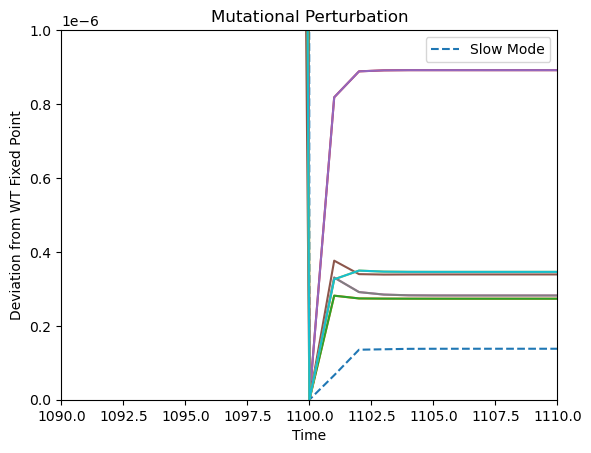

In [100]:
plot_eigenvectors(v,np.concatenate((nt_0,nt,nt_c),axis = 1),n_f,v_0_idx = 0, v_f_idx = 10)
plt.ylabel('Deviation from WT Fixed Point')
plt.title('Mutational Perturbation')
plt.xlabel('Time')
plt.xlim([1090,1110])
plt.ylim([0,0.000001])


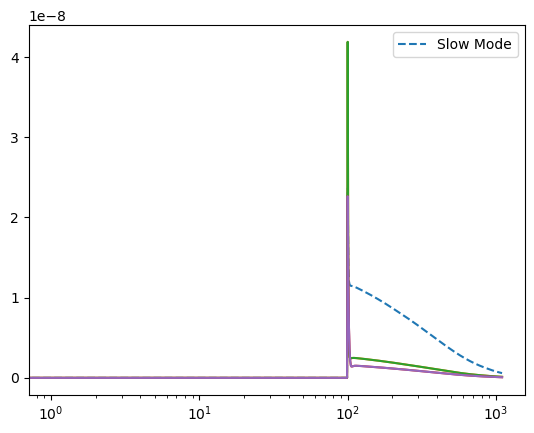

In [73]:
K = Ks[-5,:,:]
k = ks[-5,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 2000
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
nt_0 = nt[:,900:]
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)
t_f = 200

sim_dyn_controlled(n0,t_f,k,K,n_f,lam,lam_p,lam_c,s_hat)

n_p = n_f*(1+(np.random.random(len(n_f))-0.5)*0.001)
nt, t = sim_dyn(n_p,t_f,k,K,lam)
plot_eigenvectors(v,np.concatenate((nt_0,nt),axis = 1),n_f,v_0_idx = 0, v_f_idx = 5)
plt.xscale('log')
#plt.yscale('log')

In [60]:
np.concatenate((nt_0,nt),axis = 1).shape

(30, 1100)

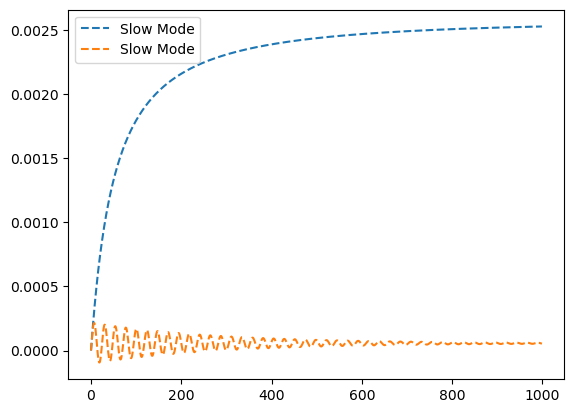

In [142]:
K = Ks[-3,:,:]
k = ks[-3,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 20
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)
w = np.real(w)

t_f = 200
idx =np.random.randint(g)

lam_p = np.zeros(g) 
lam_p[idx] = lam_p[idx]+2
lam_c = np.zeros(g) 
s_hat = np.zeros(g) 

nt, t = sim_dyn_controlled(n_f,t_f,k,K,n_f,lam,lam_p,lam_c,s_hat)
plot_eigenvectors(v,nt,n_f,v_0_idx = 0, v_f_idx = 1)

t_f = 200
lam_p = np.zeros(g) 
lam_p[idx] = lam_p[idx]+2
lam_c = lam_cs[-3]
s_hat = s_hats[-3] 

nt, t = sim_dyn_controlled(n_f,t_f,k,K,n_f,lam,lam_p,lam_c,s_hat)
plot_eigenvectors(v,nt,n_f,v_0_idx = 0, v_f_idx = 1)

In [127]:
nt[:,-1]

array([0.00020052, 0.00015133, 0.00063894, 0.00025194, 0.00128518,
       0.00023524, 0.00011676, 0.00048627, 0.00063822, 0.00029065,
       0.00043691, 0.00026907, 0.0003682 , 0.00027858, 0.00067465,
       0.00022036, 0.00025825, 0.00054569, 0.00043831, 0.00070959,
       0.00039787, 0.00036487, 0.00039953, 0.00022226, 0.00043107,
       0.00059563, 0.000433  , 0.00041232, 0.00063173, 0.00042795])

In [102]:
K = Ks[-5,:,:]
k = ks[-5,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 2000
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
nt_0 = nt[:,900:]
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)

In [104]:
w = np.real(w)
dlambda = np.sort(w)[-2]/np.sort(w)[-1]

In [105]:
dlambda

176.44243241655795

In [127]:
K = Ks[-5,:,:]
k = ks[-5,:,:]
g = K.shape[1]
lam = 5
lam = np.zeros(g)+lam
t_f = 2000
dlambdas = []
n0 = np.zeros(g) + 0.5
nt, t = sim_dyn(n0,t_f,k,K,lam)
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)
w = np.real(w)
dlambda_0 = np.sort(w)[-2]/np.sort(w)[-1]
is_connected = np.argwhere(K != 0)
for i in tqdm(range(1000)):
    k_new = np.array(k)
    K_new = np.array(K)
    j = np.random.randint(len(is_connected))
    to_change = is_connected[j]
    K_new[to_change[0],to_change[1]] = K_new[to_change[0],to_change[1]] + (np.random.rand() - 0.5)*1/5
    k_new[to_change[0],to_change[1]] = k_new[to_change[0],to_change[1]] + (np.random.rand() - 0.5)*1/5
    n0 = np.zeros(g) + 0.5
    nt, t = sim_dyn(n0,t_f,k_new,K_new,lam)
    n_f = nt[:,-1]
    J = calc_J(k_new,K_new,n_f,lam)
    w, v = np.linalg.eig(J)
    w = np.real(w)
    dlambda = np.sort(w)[-2]/np.sort(w)[-1] - dlambda_0
    dlambdas.append(dlambda)

100%|███████████████████████████████████████| 1000/1000 [01:30<00:00, 11.03it/s]


In [115]:
K[np.argwhere(K != 0)[3][0],np.argwhere(K != 0)[3][1]]

0.9108143507969565

In [118]:
is_connected = np.argwhere(K != 0)
j = np.random.randint(len(is_connected))
to_change = is_connected[j]

In [123]:
to_change

array([21, 25])

/var/folders/yg/rz5s_kp914g5hjl723fncj_80000gn/T/ipykernel_3901/2404129006.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(dlambdas),bins = 50)


(array([ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  3.,  1.,
         1.,  2.,  4.,  3.,  3.,  6.,  7.,  8., 14., 10., 12., 18., 28.,
        19., 25., 22., 29., 29., 22., 34., 26., 24., 16., 13., 13., 11.,
        10., 13.,  9.,  6.,  7.,  5.,  3.,  1.,  4.,  6.,  5.]),
 array([-3.39081322, -3.16741283, -2.94401244, -2.72061206, -2.49721167,
        -2.27381128, -2.05041089, -1.82701051, -1.60361012, -1.38020973,
        -1.15680934, -0.93340896, -0.71000857, -0.48660818, -0.26320779,
        -0.03980741,  0.18359298,  0.40699337,  0.63039376,  0.85379415,
         1.07719453,  1.30059492,  1.52399531,  1.7473957 ,  1.97079608,
         2.19419647,  2.41759686,  2.64099725,  2.86439763,  3.08779802,
         3.31119841,  3.5345988 ,  3.75799919,  3.98139957,  4.20479996,
         4.42820035,  4.65160074,  4.87500112,  5.09840151,  5.3218019 ,
         5.54520229,  5.76860267,  5.99200306,  6.21540345,  6.43880384,
         6.66220422,  6.88560461,  7.109005  ,  7.33240539,

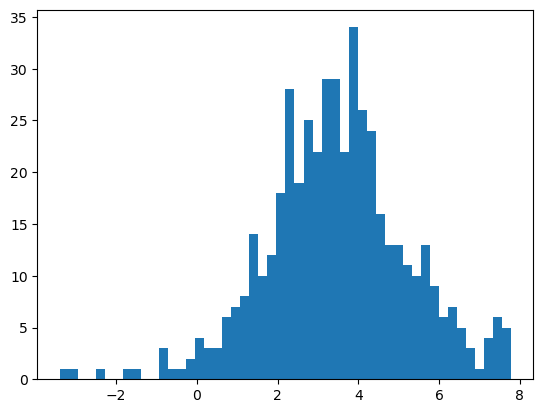

In [130]:
plt.hist(np.log(dlambdas),bins = 50)

In [9]:
temperature = 1.0
cooling_rate = 0.96
num_iterations = 1000
lam_c, s_hat =  best_lam_c,best_s_hat
n0 = np.zeros(g) + 0.5
lam = 5
nt = simulate_dynamics(k,K,lam,n0,thresh = 0.001, cutoff = 500000, dt = 0.01)
n_f = nt[:,-1]
J = calc_J(k,K,n_f,lam)
w, v = np.linalg.eig(J)
w = np.real(w)
current_dlambda = np.sort(w)[-2]/np.sort(w)[-1]
lambdas = []
is_connected = k != 0
best_k = k
best_K = K
best_cost = evaluate_fitness_controlled_norm(best_k,best_K,n_f,lam,lam_c,s_hat,m,t_f,g)

current_k = k
current_K = K
current_cost = evaluate_fitness_controlled_norm(current_k,current_K,n_f,lam,lam_c,s_hat,m,t_f,g)

costs = []

for kk in tqdm(range(2000)):
    lambdas.append(current_dlambda)
    costs.append(current_cost)
    l = np.random.randint(len(np.nonzero(is_connected)[0]))
    i, j = np.nonzero(is_connected)[0][l],np.nonzero(is_connected)[1][l]
    k_new = np.array(current_k)
    K_new = np.array(current_K)
    K_new[i,j] = K_new[i,j] + (np.random.rand() - 0.5)*2/5
    k_new[i,j] = k_new[i,j] + (np.random.rand() - 0.5)*2/5
    if k_new[i,j] < 1 and K_new[i,j] < 1 and K_new[i,j] > 0 and k_new[i,j]> 0:
        n0 = np.zeros(g) + 0.5
        nt = simulate_dynamics(k_new,K_new,lam,n0)
        n_f = nt[:,-1]
        J = calc_J(k_new,K_new,n_f,lam)
        w, v = np.linalg.eig(J)
        w = np.real(w)
        dlambda_new = np.sort(w)[-2]/np.sort(w)[-1]
        IPR_new = calc_IPR(w,v)
        new_cost = evaluate_fitness_controlled_norm(k_new,K_new,n_f,lam,lam_c,s_hat,m,t_f,g)
        if (IPR_new < 2/g) and (np.sort(w)[-1] < 0):
            if (new_cost < current_cost):
                current_k = k_new
                current_K = K_new
                current_dlambda = dlambda_new
                current_cost = new_cost
                if new_cost < best_cost:
                    best_k = k_new
                    best_K = K_new
                    best_cost = new_cost
            else:
                probability = np.exp((current_cost - new_cost) / temperature)
                if np.random.random() < probability:
                    current_k = k_new
                    current_K = K_new
                    current_dlambda = dlambda_new
                    current_cost = new_cost
        temperature *= cooling_rate

NameError: name 'best_lam_c' is not defined

In [92]:
for kk in tqdm(range(2000)):
    lambdas.append(current_dlambda)
    costs.append(current_cost)
    l = np.random.randint(len(np.nonzero(is_connected)[0]))
    i, j = np.nonzero(is_connected)[0][l],np.nonzero(is_connected)[1][l]
    k_new = np.array(current_k)
    K_new = np.array(current_K)
    K_new[i,j] = K_new[i,j] + (np.random.rand() - 0.5)*2/5
    k_new[i,j] = k_new[i,j] + (np.random.rand() - 0.5)*2/5
    if k_new[i,j] < 1 and K_new[i,j] < 1 and K_new[i,j] > 0 and k_new[i,j]> 0:
        n0 = np.zeros(g) + 0.5
        nt = simulate_dynamics(k_new,K_new,lam,n0)
        n_f = nt[:,-1]
        J = calc_J(k_new,K_new,n_f,lam)
        w, v = np.linalg.eig(J)
        w = np.real(w)
        dlambda_new = np.sort(w)[-2]/np.sort(w)[-1]
        IPR_new = calc_IPR(w,v)
        new_cost = evaluate_fitness_controlled_norm(k_new,K_new,n_f,lam,lam_c,s_hat,m,t_f,g)
        if (IPR_new < 2/g) and (np.sort(w)[-1] < 0):
            if (new_cost < current_cost):
                current_k = k_new
                current_K = K_new
                current_dlambda = dlambda_new
                current_cost = new_cost
                if new_cost < best_cost:
                    best_k = k_new
                    best_K = K_new
                    best_cost = new_cost
            else:
                probability = np.exp((current_cost - new_cost) / temperature)
                if np.random.random() < probability:
                    current_k = k_new
                    current_K = K_new
                    current_dlambda = dlambda_new
                    current_cost = new_cost
        temperature *= cooling_rate

  1%|▎                                        | 16/2000 [00:29<59:58,  1.81s/it]


KeyboardInterrupt: 

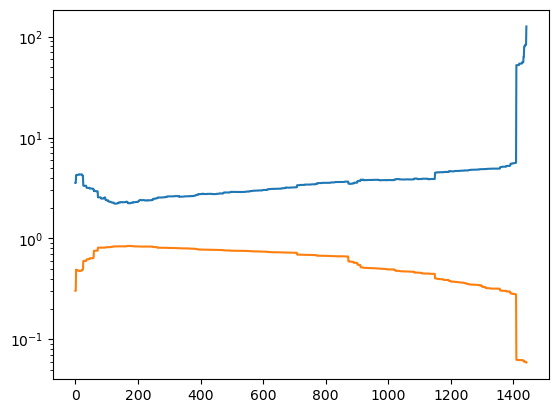

In [94]:
plt.plot(lambdas)
plt.plot(costs)
plt.yscale('log')

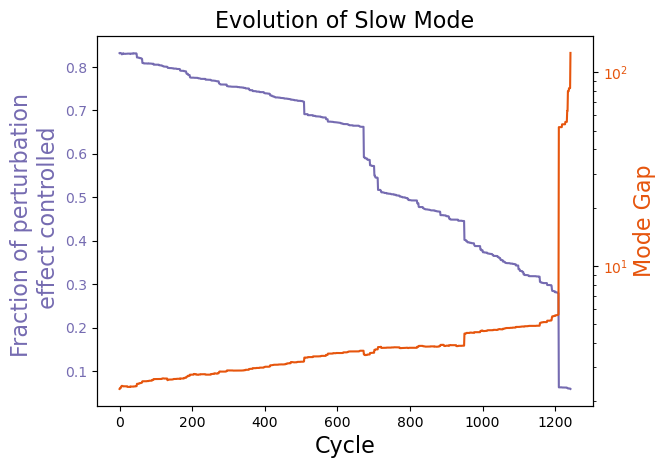

In [110]:
import palettable.colorbrewer.sequential as pal
colors = pal.Purples_5.mpl_colors
colors2 = pal.Oranges_5.mpl_colors
fig, ax1 = plt.subplots()
ax1.plot(costs[200:], color=colors[-2])
ax1.set_xlabel('Cycle',fontsize=16)
ax1.set_ylabel('Fraction of perturbation \n effect controlled', color=colors[-2],fontsize=16)
ax1.tick_params(axis='y', labelcolor=colors[-2])
ax2 = ax1.twinx()

# Plot the second time series on the log scale (right axis)
ax2.semilogy(lambdas[200:], color=colors2[-2])
ax2.set_ylabel('Mode Gap', color=colors2[-2],fontsize=16)
ax2.tick_params(axis='y', labelcolor=colors2[-2])


# Set the title
plt.title('Evolution of Slow Mode',fontsize=16)

# Show the plot
plt.show()
fig.savefig('evolve2.svg', format='svg')




In [53]:
is_connected == (K!=0)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,

In [54]:
is_connected

array([[False,  True,  True, False, False, False, False, False, False,
        False, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False],
       [ True, False,  True, False, False, False, False, False,  True,
        False, False,  True, False,  True, False, False, False,  True,
        False, False, False, False,  True, False, False,  True, False,
        False, False, False],
       [ True,  True, False, False,  True,  True, False, False, False,
         True, False, False, False,  True, False, False, False, False,
        False,  True, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False,  True, False,
        False, False, False],
       [False, False,  True,